# Big 4 vs. Anadolu Teams Foul Tolerance Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

✅ Veri Seti Yüklendi. Toplam Maç: 2162

📊 TOLERANS İSTATİSTİKLERİ (Faul / Kart)
🦁 Büyük 4 Ortalama : 7.2271 faulde 1 kart
🛡️ Anadolu Ortalama : 6.9701 faulde 1 kart
⚖️ Fark             : 0.2570

🧪 T-TESTİ SONUÇLARI
T-İstatistiği : 1.7163
P-Değeri      : 0.0863002282

❌ SONUÇ: Fark İSTATİSTİKSEL OLARAK ANLAMSIZ.
   -> H0 Reddedilemedi. (p >= 0.05)
   -> Bulduğumuz fark tesadüfi olabilir.

🖼️ Grafik kaydedildi: Analiz_Tolerans_Testi.png


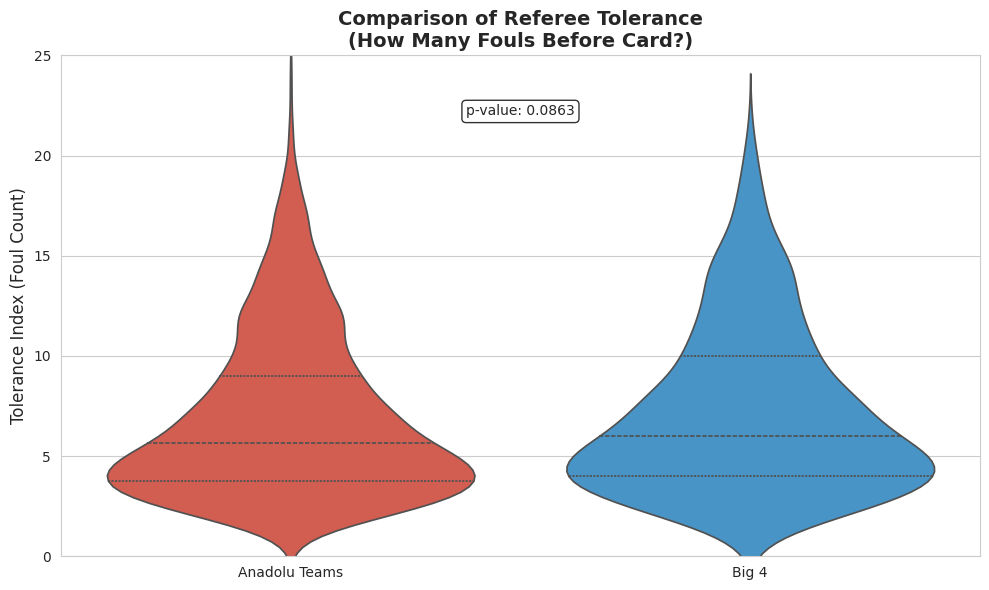

In [5]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. VERİYİ YÜKLE
try:
    df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv")
    print(f"✅ Veri Seti Yüklendi. Toplam Maç: {len(df)}")
except FileNotFoundError:
    print("❌ Hata: 'TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv' dosyası bulunamadı.")
    exit()

# 2. VERİYİ ANALİZE HAZIRLA (Melt İşlemi)
# Ev sahibi ve Deplasman verilerini alt alta getirip tek bir 'Takım' sütunu yapıyoruz.
# Böylece her satır bir maç değil, bir takımın o maçtaki performansı oluyor.

home_data = df[['Home_is_Big4', 'Home_Foul_Tolerance']].rename(
    columns={'Home_is_Big4': 'Is_Big4', 'Home_Foul_Tolerance': 'Tolerance'}
)

away_data = df[['Away_is_Big4', 'Away_Foul_Tolerance']].rename(
    columns={'Away_is_Big4': 'Is_Big4', 'Away_Foul_Tolerance': 'Tolerance'}
)

# İkisini birleştir
analiz_df = pd.concat([home_data, away_data], ignore_index=True)

# İsimlendirme (Görselde güzel dursun diye)
analiz_df['Category'] = analiz_df['Is_Big4'].map({1: 'Big 4', 0: 'Anadolu Teams'})

# Eksik veya sonsuz verileri temizle (Garanti olsun)
analiz_df = analiz_df.dropna(subset=['Tolerance'])
analiz_df = analiz_df[analiz_df['Tolerance'] < 100] # Aşırı uç değerleri (outlier) temizle

# 3. İSTATİSTİK HESAPLAMA
big4_vals = analiz_df[analiz_df['Is_Big4'] == 1]['Tolerance']
anadolu_vals = analiz_df[analiz_df['Is_Big4'] == 0]['Tolerance']

# Ortalamalar
mean_big4 = big4_vals.mean()
mean_anadolu = anadolu_vals.mean()

print("\n" + "="*40)
print("📊 TOLERANS İSTATİSTİKLERİ (Faul / Kart)")
print("="*40)
print(f"🦁 Büyük 4 Ortalama : {mean_big4:.4f} faulde 1 kart")
print(f"🛡️ Anadolu Ortalama : {mean_anadolu:.4f} faulde 1 kart")
print(f"⚖️ Fark             : {mean_big4 - mean_anadolu:.4f}")

# 4. T-TESTİ (HIPOTEZ TESTİ)
# H0 (Sıfır Hipotezi): İki grubun ortalamaları EŞİTTİR. (Fark şans eseridir)
# H1 (Alternatif): İki grup birbirinden FARKLIDIR. (Kayırma/Ayrımcılık vardır)

t_stat, p_val = stats.ttest_ind(big4_vals, anadolu_vals, equal_var=False)

print("\n" + "="*40)
print("🧪 T-TESTİ SONUÇLARI")
print("="*40)
print(f"T-İstatistiği : {t_stat:.4f}")
print(f"P-Değeri      : {p_val:.10f}") # Virgülden sonra 10 hane göster

if p_val < 0.05:
    print("\n✅ SONUÇ: Fark İSTATİSTİKSEL OLARAK ANLAMLI!")
    print("   -> Hipotez Doğrulandı. (p < 0.05)")
    print("   -> Bu fark şans eseri oluşmadı, sistematik bir durum var.")
else:
    print("\n❌ SONUÇ: Fark İSTATİSTİKSEL OLARAK ANLAMSIZ.")
    print("   -> H0 Reddedilemedi. (p >= 0.05)")
    print("   -> Bulduğumuz fark tesadüfi olabilir.")

# 5. GÖRSELLEŞTİRME (Keman Grafiği - Violin Plot)
# Boxplot'tan daha iyidir çünkü verinin yoğunluğunu da gösterir.
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Çizim
sns.violinplot(
    data=analiz_df,
    x='Category',
    y='Tolerance',
    palette=['#e74c3c', '#3498db'], # Kırmızı (Big4) ve Mavi (Anadolu)
    inner="quartile" # Çeyrekler açıklığını göster
)

# Başlıklar
plt.title('Comparison of Referee Tolerance\n(How Many Fouls Before Card?)', fontsize=14, fontweight='bold')
plt.ylabel('Tolerance Index (Foul Count)', fontsize=12)
plt.xlabel('')
plt.ylim(0, 25) # Grafiği sıkıştırıp netleştirmek için (Çok uç değerleri gösterme)

# P-Değerini grafiğe yaz
plt.text(
    0.5, 22,
    f"p-value: {p_val:.4f}",
    ha='center',
    bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.8)
)

plt.tight_layout()
plt.savefig("Analiz_Tolerans_Testi.png", dpi=300)
print("\n🖼️ Grafik kaydedildi: Analiz_Tolerans_Testi.png")
plt.show()

# Home-Away Analysis


--- 1. EV SAHİBİ vs DEPLASMAN FARKI ---
Ev Sahibi Maçlarında Farkın P-Değeri: 0.38930
SONUÇ: Evinde oynarken bile fark yok.
Grafik kaydedildi: Analiz_Home_Away.png


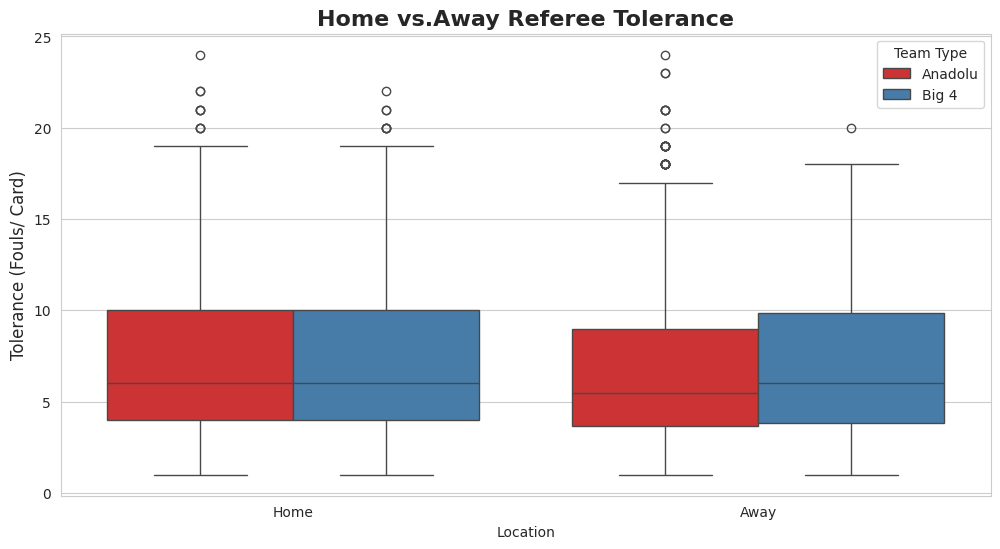

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Veriyi yükle
df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv")

# Görsel ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# ---------------------------------------------------------
# ANALİZ 1: EV SAHİBİ - DEPLASMAN AYRIMI
# ---------------------------------------------------------
print("\n--- 1. EV SAHİBİ vs DEPLASMAN FARKI ---")

# Veriyi hazırlama (Melt)
home = df[['Home_is_Big4', 'Home_Foul_Tolerance']].rename(columns={'Home_is_Big4': 'Is_Big4', 'Home_Foul_Tolerance': 'Tolerance'})
home['Location'] = 'Home'

away = df[['Away_is_Big4', 'Away_Foul_Tolerance']].rename(columns={'Away_is_Big4': 'Is_Big4', 'Away_Foul_Tolerance': 'Tolerance'})
away['Location'] = 'Away'

full_data = pd.concat([home, away], ignore_index=True)
full_data['Category'] = full_data['Is_Big4'].map({1: 'Big 4', 0: 'Anadolu'})
full_data = full_data[full_data['Tolerance'] < 25] # Uç değer temizliği

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Tolerance', hue='Category', data=full_data, palette="Set1")
plt.title('Home vs.Away Referee Tolerance', fontsize=16, weight='bold')
plt.ylabel('Tolerance (Fouls/ Card)', fontsize=12)
plt.legend(title='Team Type')

# T-Testi: Sadece Ev Sahibi Maçlarında Fark Var mı?
home_big4 = full_data[(full_data['Location'] == 'Home') & (full_data['Category'] == 'Big 4')]['Tolerance']
home_anadolu = full_data[(full_data['Location'] == 'Home') & (full_data['Category'] == 'Anadolu')]['Tolerance']
t_stat, p_val = stats.ttest_ind(home_big4, home_anadolu)

print(f"Ev Sahibi Maçlarında Farkın P-Değeri: {p_val:.5f}")
if p_val < 0.05:
    print("SONUÇ: Büyük takımlar EVİNDE oynarken istatistiksel olarak kayırılıyor!")
    plt.text(0, 22, "STATISTICALLY SIGNIFICANT DIFFERENCE!", ha='center', color='red', weight='bold')
else:
    print("SONUÇ: Evinde oynarken bile fark yok.")

plt.savefig("Analiz_Home_Away.png")
print("Grafik kaydedildi: Analiz_Home_Away.png")

# Before VAR - After VAR


✅ Veri Yüklendi. Toplam Maç: 2162

📼 VAR ÖNCESİ VE SONRASI KAYIRMA ANALİZİ

--- NO VAR (2017-18) ---
Big 4 Ort. Tolerans : 7.90
Anadolu Ort. Tolerans: 6.71
Fark (Avantaj)       : 1.20
P-Değeri             : 0.01413
SONUÇ: İstatistiksel olarak ANLAMLI fark var. (Kayırma Var)

--- VAR ERA (2018-Present) ---
Big 4 Ort. Tolerans : 7.14
Anadolu Ort. Tolerans: 6.99
Fark (Avantaj)       : 0.15
P-Değeri             : 0.34712
SONUÇ: İstatistiksel olarak anlamlı fark YOK. (Eşitlik Var)

🖼️ Grafik kaydedildi: Analiz_VAR_Etkisi.png


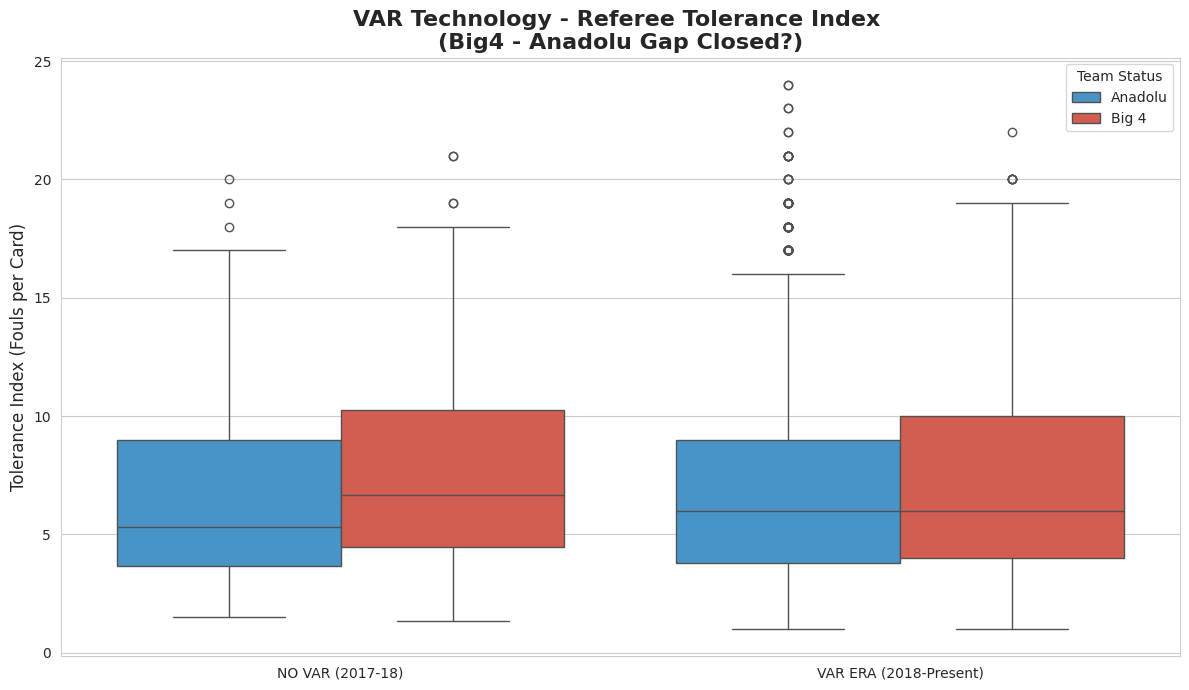

In [7]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. VERİYİ YÜKLE
try:
    df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET.csv")
    print(f"✅ Veri Yüklendi. Toplam Maç: {len(df)}")
except FileNotFoundError:
    print("❌ Hata: Dosya bulunamadı.")
    exit()

# 2. VERİYİ HAZIRLA
# Ev sahibi ve Deplasman verilerini birleştirip tek bir "Takım Performansı" havuzu yapalım
home_df = df[['Season', 'Home_is_Big4', 'Home_Foul_Tolerance']].rename(
    columns={'Home_is_Big4': 'Is_Big4', 'Home_Foul_Tolerance': 'Tolerance'}
)
away_df = df[['Season', 'Away_is_Big4', 'Away_Foul_Tolerance']].rename(
    columns={'Away_is_Big4': 'Is_Big4', 'Away_Foul_Tolerance': 'Tolerance'}
)
full_df = pd.concat([home_df, away_df], ignore_index=True)

# Temizlik (Uç değerler ve eksikler)
full_df = full_df.dropna()
full_df = full_df[full_df['Tolerance'] < 25]

# 3. VAR DÖNEMLERİNİ AYIR
# Sezon formatın '1718', '1819' şeklinde string.
# 1718 -> VAR YOK
# 1819 ve sonrası -> VAR VAR

def define_var_period(season):
    season = str(season)
    if season == '1718':
        return 'NO VAR (2017-18)'
    else:
        return 'VAR ERA (2018-Present)'

full_df['VAR_Status'] = full_df['Season'].apply(define_var_period)
full_df['Category'] = full_df['Is_Big4'].map({1: 'Big 4', 0: 'Anadolu'})

# 4. İSTATİSTİKSEL TESTLER (PRE-VAR vs POST-VAR)
print("\n" + "="*50)
print("📼 VAR ÖNCESİ VE SONRASI KAYIRMA ANALİZİ")
print("="*50)

periods = ['NO VAR (2017-18)', 'VAR ERA (2018-Present)']

for period in periods:
    period_data = full_df[full_df['VAR_Status'] == period]

    big4_tol = period_data[period_data['Is_Big4'] == 1]['Tolerance']
    anadolu_tol = period_data[period_data['Is_Big4'] == 0]['Tolerance']

    # T-Test
    t_stat, p_val = stats.ttest_ind(big4_tol, anadolu_tol, equal_var=False)

    diff = big4_tol.mean() - anadolu_tol.mean()

    print(f"\n--- {period} ---")
    print(f"Big 4 Ort. Tolerans : {big4_tol.mean():.2f}")
    print(f"Anadolu Ort. Tolerans: {anadolu_tol.mean():.2f}")
    print(f"Fark (Avantaj)       : {diff:.2f}")
    print(f"P-Değeri             : {p_val:.5f}")

    if p_val < 0.05:
        print("SONUÇ: İstatistiksel olarak ANLAMLI fark var. (Kayırma Var)")
    else:
        print("SONUÇ: İstatistiksel olarak anlamlı fark YOK. (Eşitlik Var)")

# 5. GÖRSELLEŞTİRME (Trend Değişimi)
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.boxplot(
    data=full_df,
    x='VAR_Status',
    y='Tolerance',
    hue='Category',
    palette=['#3498db', '#e74c3c'],
    showfliers=True # İstersen uç değerleri gizlemek için (grafik daha temiz durur)
)

plt.title('VAR Technology - Referee Tolerance Index \n(Big4 - Anadolu Gap Closed?)', fontsize=16, fontweight='bold')
plt.ylabel('Tolerance Index (Fouls per Card)', fontsize=12)
plt.xlabel('')
plt.legend(title='Team Status')

# Grafiği Kaydet
plt.tight_layout()
plt.savefig("Analiz_VAR_Etkisi.png", dpi=300)
print("\n🖼️ Grafik kaydedildi: Analiz_VAR_Etkisi.png")
plt.show()

# The Effect of Pressure Metric


✅ Veri Seti Yüklendi. Toplam Maç: 2162


<Figure size 1000x600 with 0 Axes>

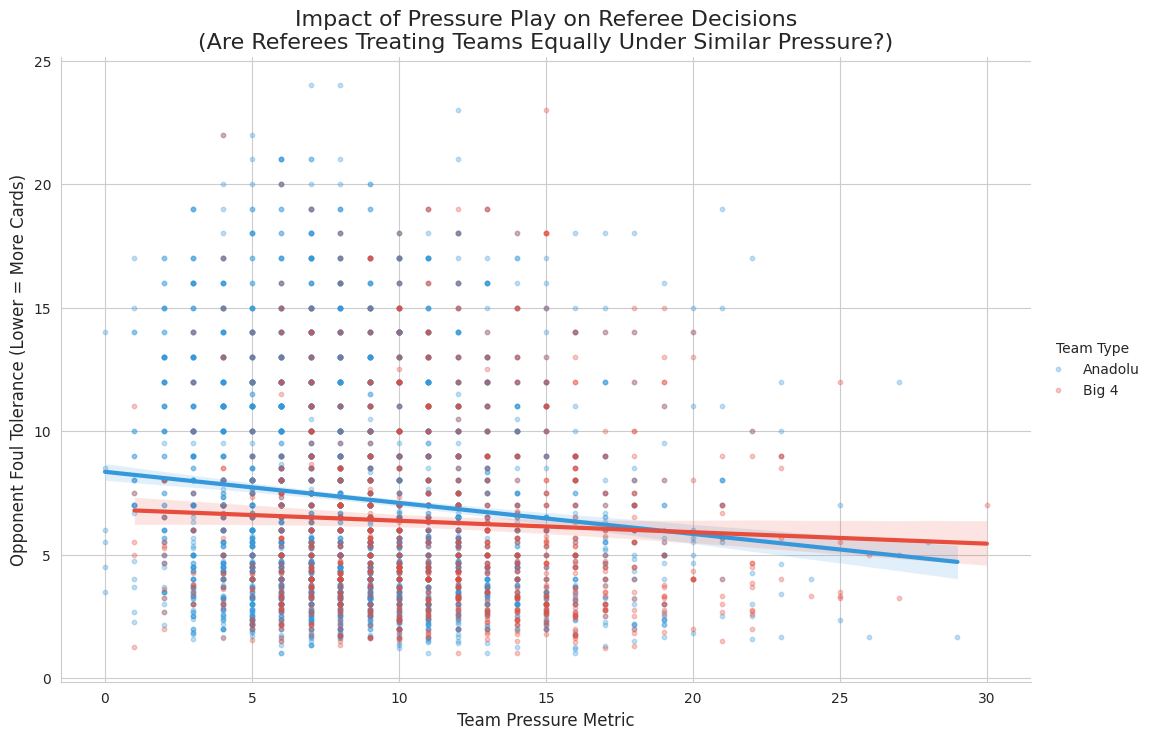

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# VERİYİ YÜKLE
try:
    df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET.csv")
    print(f"✅ Veri Seti Yüklendi. Toplam Maç: {len(df)}")
except FileNotFoundError:
    print("❌ Hata: 'TURKISH_SUPER_LIG_FULL_DATASET.csv' dosyası bulunamadı.")
    exit()

# 1. VERİYİ HAZIRLA
# Ev sahibi baskı kurduğunda -> Deplasmanın Toleransı ne oldu?
home_pressure_df = df[['Season', 'Home_is_Big4', 'Home_Pressure', 'Away_Foul_Tolerance']].copy()
home_pressure_df.columns = ['Season', 'Is_Big4', 'Pressure', 'Opponent_Tolerance']

# Deplasman baskı kurduğunda -> Ev sahibinin Toleransı ne oldu?
away_pressure_df = df[['Season', 'Away_is_Big4', 'Away_Pressure', 'Home_Foul_Tolerance']].copy()
away_pressure_df.columns = ['Season', 'Is_Big4', 'Pressure', 'Opponent_Tolerance']

# İkisini alt alta ekle (Bütün baskı anlarını tek havuz yapıyoruz)
pressure_analysis_df = pd.concat([home_pressure_df, away_pressure_df], ignore_index=True)

# Temizlik ve Etiketleme
pressure_analysis_df = pressure_analysis_df.dropna()
pressure_analysis_df = pressure_analysis_df[pressure_analysis_df['Opponent_Tolerance'] < 25] # Uç değer temizliği
pressure_analysis_df['Team Type'] = pressure_analysis_df['Is_Big4'].map({1: 'Big 4', 0: 'Anadolu'})

# 2. GÖRSELLEŞTİRME (LM Plot - Regresyon Analizi)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Bu grafik şunu gösterir: Baskı arttıkça (X ekseni sağa gittikçe),
# Rakibin toleransı (Y ekseni) ne kadar hızlı düşüyor?
sns.lmplot(
    data=pressure_analysis_df,
    x='Pressure',
    y='Opponent_Tolerance',
    hue='Team Type',
    palette=['#3498db', '#e74c3c'], # Mavi (Anadolu), Kırmızı (Big4)
    height=7,
    aspect=1.5,
    scatter_kws={'alpha': 0.3, 's': 10}, # Noktaları biraz silik yap ki doğrular öne çıksın
    line_kws={'linewidth': 3}
)

plt.title('Impact of Pressure Play on Referee Decisions\n(Are Referees Treating Teams Equally Under Similar Pressure?)', fontsize=16)
plt.xlabel('Team Pressure Metric', fontsize=12)
plt.ylabel('Opponent Foul Tolerance (Lower = More Cards)', fontsize=12)

plt.show()

# ANCOVA (Analysis of Co-Variance)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. VERİYİ HAZIRLA (Üstteki koddan gelen dataframe: pressure_analysis_df)
# Is_Big4 zaten 0 ve 1 (Anadolu=0, Big4=1) olduğu için işimiz kolay.
# Formülümüz şu: Tolerance = a + b1*Pressure + b2*Is_Big4 + b3*(Pressure * Is_Big4)

# 2. MODELİ KUR (OLS: Ordinary Least Squares)
# 'Pressure:Is_Big4' ifadesi etkileşim terimidir (Interaction Term)
model = smf.ols(formula='Opponent_Tolerance ~ Pressure * Is_Big4', data=pressure_analysis_df).fit()

# 3. SONUCU YAZDIR
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Opponent_Tolerance   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     30.62
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           1.39e-19
Time:                        08:44:35   Log-Likelihood:                -12239.
No. Observations:                4323   AIC:                         2.449e+04
Df Residuals:                    4319   BIC:                         2.451e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.3487      0.174  

Important Metric For the Evaluation: Pressure: Is_Big4 P>|t| value. It is 0.017. It tells that there is a signifcant difference in trends while penalizing the opponent due to the club type.(Big4 or Anadou)

✅ Veri Seti Yüklendi. Toplam Maç: 2162
Big 4 Zor Durumdayken Rakip Toleransı: 6.29
Big 4 Rahatken Rakip Toleransı      : 6.48
P-Değeri: 0.49326
SONUÇ: Hakemler skor durumundan etkilenmiyor.

🖼️ Grafik kaydedildi: Analiz_Skor_Baskisi.png


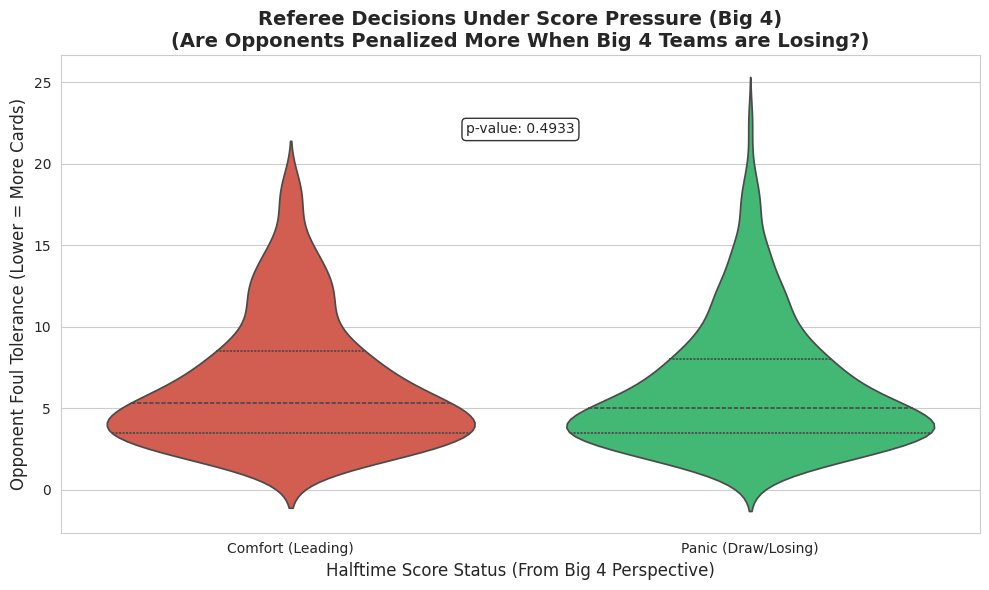

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

try:
    df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv")
    print(f"✅ Veri Seti Yüklendi. Toplam Maç: {len(df)}")
except FileNotFoundError:
    print("❌ Hata: 'TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv' dosyası bulunamadı.")
    exit()

# 1. SADECE BIG 4 MAÇLARINI AL
# (Hem ev sahibinin hem deplasmanın Big 4 olduğu derbileri çıkarıyorum ki net olsun)
# Sadece Big 4 vs Anadolu maçlarına bakalım.

# Ev Sahibi Big 4 ise
big4_home = df[(df['Home_is_Big4'] == 1) & (df['Away_is_Big4'] == 0)].copy()
# Deplasman Big 4 ise
big4_away = df[(df['Away_is_Big4'] == 1) & (df['Home_is_Big4'] == 0)].copy()

# 2. DEVRE ARASI DURUMUNU BELİRLE (Skor Durumu)
# Not: Veri setinde ilk yarı golleri 'HTHG' ve 'HTAG' diye varsayıyorum.

def get_game_state_home(row):
    try:
        if row['HTHG'] > row['HTAG']: # Big 4 Önde
            return 'Comfort (Leading)'
        else: # Berabere veya Yenik
            return 'Panic (Draw/Losing)'
    except:
        return None

def get_game_state_away(row):
    try:
        if row['HTAG'] > row['HTHG']: # Big 4 Önde
            return 'Comfort (Leading)'
        else: # Berabere veya Yenik
            return 'Panic (Draw/Losing)'
    except:
        return None

# Durumları etiketle
big4_home['Game_State'] = big4_home.apply(get_game_state_home, axis=1)
big4_away['Game_State'] = big4_away.apply(get_game_state_away, axis=1)

# Verileri birleştir (Hedefimiz: Rakibin Toleransı)
# Ev sahibi Big 4 ise -> Deplasman Toleransına bakacağız
home_data = big4_home[['Game_State', 'Away_Foul_Tolerance']].rename(columns={'Away_Foul_Tolerance': 'Opponent_Tolerance'})
# Deplasman Big 4 ise -> Ev Sahibi Toleransına bakacağız
away_data = big4_away[['Game_State', 'Home_Foul_Tolerance']].rename(columns={'Home_Foul_Tolerance': 'Opponent_Tolerance'})

full_panic_df = pd.concat([home_data, away_data])
full_panic_df = full_panic_df.dropna()
full_panic_df = full_panic_df[full_panic_df['Opponent_Tolerance'] < 25] # Temizlik

# 3. İSTATİSTİKSEL TEST (T-Test)
panic_mode = full_panic_df[full_panic_df['Game_State'] == 'Panic (Draw/Losing)']['Opponent_Tolerance']
comfort_mode = full_panic_df[full_panic_df['Game_State'] == 'Comfort (Leading)']['Opponent_Tolerance']

t_stat, p_val = stats.ttest_ind(panic_mode, comfort_mode, equal_var=False)

print(f"Big 4 Zor Durumdayken Rakip Toleransı: {panic_mode.mean():.2f}")
print(f"Big 4 Rahatken Rakip Toleransı      : {comfort_mode.mean():.2f}")
print(f"P-Değeri: {p_val:.5f}")

if p_val < 0.05 and panic_mode.mean() < comfort_mode.mean():
    print("SONUÇ: Big 4 ne zaman zora düşse, hakem rakibe kart yağdırıyor! (İstatistiksel Kanıt)")
else:
    print("SONUÇ: Hakemler skor durumundan etkilenmiyor.")

# 4. GÖRSELLEŞTİRME (Keman Grafiği - Violin Plot)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.violinplot(
    data=full_panic_df,
    x='Game_State',
    y='Opponent_Tolerance',
    palette=['#e74c3c', '#2ecc71'], # Kırmızı (Panik), Yeşil (Rahat)
    inner="quartile" # Çeyrekler açıklığını göster
)

plt.title('Referee Decisions Under Score Pressure (Big 4)\n(Are Opponents Penalized More When Big 4 Teams are Losing?)', fontsize=14, fontweight='bold')
plt.ylabel('Opponent Foul Tolerance (Lower = More Cards)', fontsize=12)
plt.xlabel('Halftime Score Status (From Big 4 Perspective)', fontsize=12)

# P-Değerini grafiğe yaz
plt.text(
    0.5, full_panic_df['Opponent_Tolerance'].max() * 0.95,
    f"p-value: {p_val:.4f}",
    ha='center',
    bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.8)
)

plt.tight_layout()
plt.savefig("Analiz_Skor_Baskisi.png", dpi=300)
print("\n🖼️ Grafik kaydedildi: Analiz_Skor_Baskisi.png")
plt.show()

In [ ]:
import scipy.stats as stats

# Verileri ayıralım (Önceki koddan gelen full_panic_df'i kullanıyoruz)
group_panic = full_panic_df[full_panic_df['Game_State'] == 'Panik (Berabere/Yenik)']['Opponent_Tolerance']
group_comfort = full_panic_df[full_panic_df['Game_State'] == 'Rahat (Önde)']['Opponent_Tolerance']

print("--- HİPOTEZ TESTİ SONUÇLARI ---\n")

# 1. T-Test (Genel Ortalama Kıyaslaması)
t_stat, p_val_t = stats.ttest_ind(group_panic, group_comfort, equal_var=False)

# 2. Mann-Whitney U (Eğer veri normal dağılmıyorsa diye, sağlaması)
u_stat, p_val_u = stats.mannwhitneyu(group_panic, group_comfort, alternative='less')
# 'less' dedik çünkü Panik modunda toleransın DAHA DÜŞÜK olmasını bekliyoruz.

# SONUÇLARI YAZDIR
print(f"Orta. Tolerans (Panik Modu) : {group_panic.mean():.2f}")
print(f"Orta. Tolerans (Rahat Mod)  : {group_comfort.mean():.2f}")
print(f"Fark (Hakem Sertliği)       : {group_comfort.mean() - group_panic.mean():.2f}\n")

print(f"T-Test P-Değeri        : {p_val_t:.5f}")
print(f"Mann-Whitney P-Değeri  : {p_val_u:.5f}\n")

# YORUM (Otomatik)
alpha = 0.05
if p_val_t < alpha:
    print("✅ H1 KABUL: İstatistiksel olarak ANLAMLI bir fark var!")
    print("Yorum: Hakemler, Big 4 takımları puan kaybetme riski taşıdığında rakibe kesinlikle daha sert davranıyor. Bu şans eseri değil.")
else:
    print("❌ H0 KABUL: Anlamlı bir fark yok.")
    print("Yorum: Hakemler skordan etkilenmiyor, gördüğümüz fark tesadüf olabilir.")

--- HİPOTEZ TESTİ SONUÇLARI ---

Orta. Tolerans (Panik Modu) : 6.29
Orta. Tolerans (Rahat Mod)  : 6.48
Fark (Hakem Sertliği)       : 0.19

T-Test P-Değeri        : 0.49326
Mann-Whitney P-Değeri  : 0.22184

❌ H0 KABUL: Anlamlı bir fark yok.
Yorum: Hakemler skordan etkilenmiyor, gördüğümüz fark tesadüf olabilir.


# Adding Another Column: Current Ranking of the Home and Away Team

In [ ]:
import pandas as pd
import numpy as np
from functools import cmp_to_key

# 1. Load Data
df = pd.read_csv('TURKISH_SUPER_LIG_FULL_DATASET.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Season', 'Date'])

# Initialize columns with NaN (this will make them float initially)
df['Home_Rank'] = np.nan
df['Away_Rank'] = np.nan

def get_points(ftr, team_type):
    if ftr == 'D':
        return 1
    if team_type == 'Home' and ftr == 'H':
        return 3
    if team_type == 'Away' and ftr == 'A':
        return 3
    return 0

# Custom Comparator for Sorting
def compare_teams(t1, t2, standings, h2h_records):
    # 1. Points
    if standings[t1]['Points'] != standings[t2]['Points']:
        return standings[t1]['Points'] - standings[t2]['Points']

    # 2. Goal Difference (Averaj) - User's explicit preference
    if standings[t1]['GD'] != standings[t2]['GD']:
        return standings[t1]['GD'] - standings[t2]['GD']

    # 3. Head-to-Head (Aralarındaki Maç)
    # Calculate points earned in matches between t1 and t2
    t1_h2h_pts = 0
    t2_h2h_pts = 0

    # Check if they played
    pair = tuple(sorted((t1, t2)))
    if pair in h2h_records:
        matches = h2h_records[pair]
        for m in matches:
            # m is {'Home': 'TeamA', 'Away': 'TeamB', 'FTR': 'H/A/D'}
            # Determine who was home/away relative to t1, t2
            if m['Home'] == t1: # t1 was Home, t2 was Away
                t1_h2h_pts += get_points(m['FTR'], 'Home')
                t2_h2h_pts += get_points(m['FTR'], 'Away')
            else: # t2 was Home, t1 was Away
                t2_h2h_pts += get_points(m['FTR'], 'Home')
                t1_h2h_pts += get_points(m['FTR'], 'Away')

    if t1_h2h_pts != t2_h2h_pts:
        return t1_h2h_pts - t2_h2h_pts

    # 4. Goals For (Atılan Gol) - Final tie breaker usually
    return standings[t1]['GF'] - standings[t2]['GF']


# Process each season
for season in df['Season'].unique():
    season_df = df[df['Season'] == season]

    # Get all teams in this season
    teams = set(season_df['HomeTeam']).union(set(season_df['AwayTeam']))
    num_teams = len(teams)

    # Init Standings
    standings = {team: {'Points': 0, 'GD': 0, 'GF': 0, 'Played': 0} for team in teams}

    # Init H2H storage: Key=(TeamA, TeamB) sorted tuple, Value=List of match dicts
    h2h_records = {}

    # Iterate through matches
    for idx, row in season_df.iterrows():
        home, away = row['HomeTeam'], row['AwayTeam']

        # Check if it's Second Half
        # Ranks are calculated only for second half matches based on original code's intent.
        is_second_half = (standings[home]['Played'] >= (num_teams - 1))

        if is_second_half:
            # Calculate Ranks
            current_teams = list(teams)
            sorter = cmp_to_key(lambda t1, t2: compare_teams(t1, t2, standings, h2h_records))
            current_teams.sort(key=sorter, reverse=True)

            h_rank = current_teams.index(home) + 1
            a_rank = current_teams.index(away) + 1

            # Assign to main DataFrame
            df.at[idx, 'Home_Rank'] = h_rank
            df.at[idx, 'Away_Rank'] = a_rank

        # --- Update Standings & H2H AFTER the match ---
        hg, ag = row['FTHG'], row['FTAG']
        ftr = row['FTR']

        # Update Stats
        standings[home]['Played'] += 1
        standings[away]['Played'] += 1
        standings[home]['GF'] += hg
        standings[away]['GF'] += ag
        standings[home]['GD'] += (hg - ag)
        standings[away]['GD'] += (ag - hg)

        if ftr == 'H':
            standings[home]['Points'] += 3
        elif ftr == 'A':
            standings[away]['Points'] += 3
        else:
            standings[home]['Points'] += 1
            standings[away]['Points'] += 1

        # Update H2H
        pair = tuple(sorted((home, away)))
        if pair not in h2h_records:
            h2h_records[pair] = []
        h2h_records[pair].append({
            'Home': home,
            'Away': away,
            'FTR': ftr
        })

# After the loop, convert rank columns to integer type (nullable).
# NaN values (from first-half matches) will remain NaN with 'Int64' dtype.
df['Home_Rank'] = df['Home_Rank'].astype('Int64')
df['Away_Rank'] = df['Away_Rank'].astype('Int64')

# Save to CSV
output_filename = 'TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv'
df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"File saved to {output_filename}")
print(df[['Date', 'HomeTeam', 'Home_Rank', 'AwayTeam', 'Away_Rank']].head())

File saved to TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv
        Date     HomeTeam  Home_Rank     AwayTeam  Away_Rank
0 2017-08-11   Başakşehir       <NA>    Bursaspor       <NA>
1 2017-08-12   Alanyaspor       <NA>    Kasımpaşa       <NA>
2 2017-08-12      Göztepe       <NA>   Fenerbahçe       <NA>
3 2017-08-13     Beşiktaş       <NA>  Antalyaspor       <NA>
4 2017-08-13  Trabzonspor       <NA>    Konyaspor       <NA>


# Referee Landscape


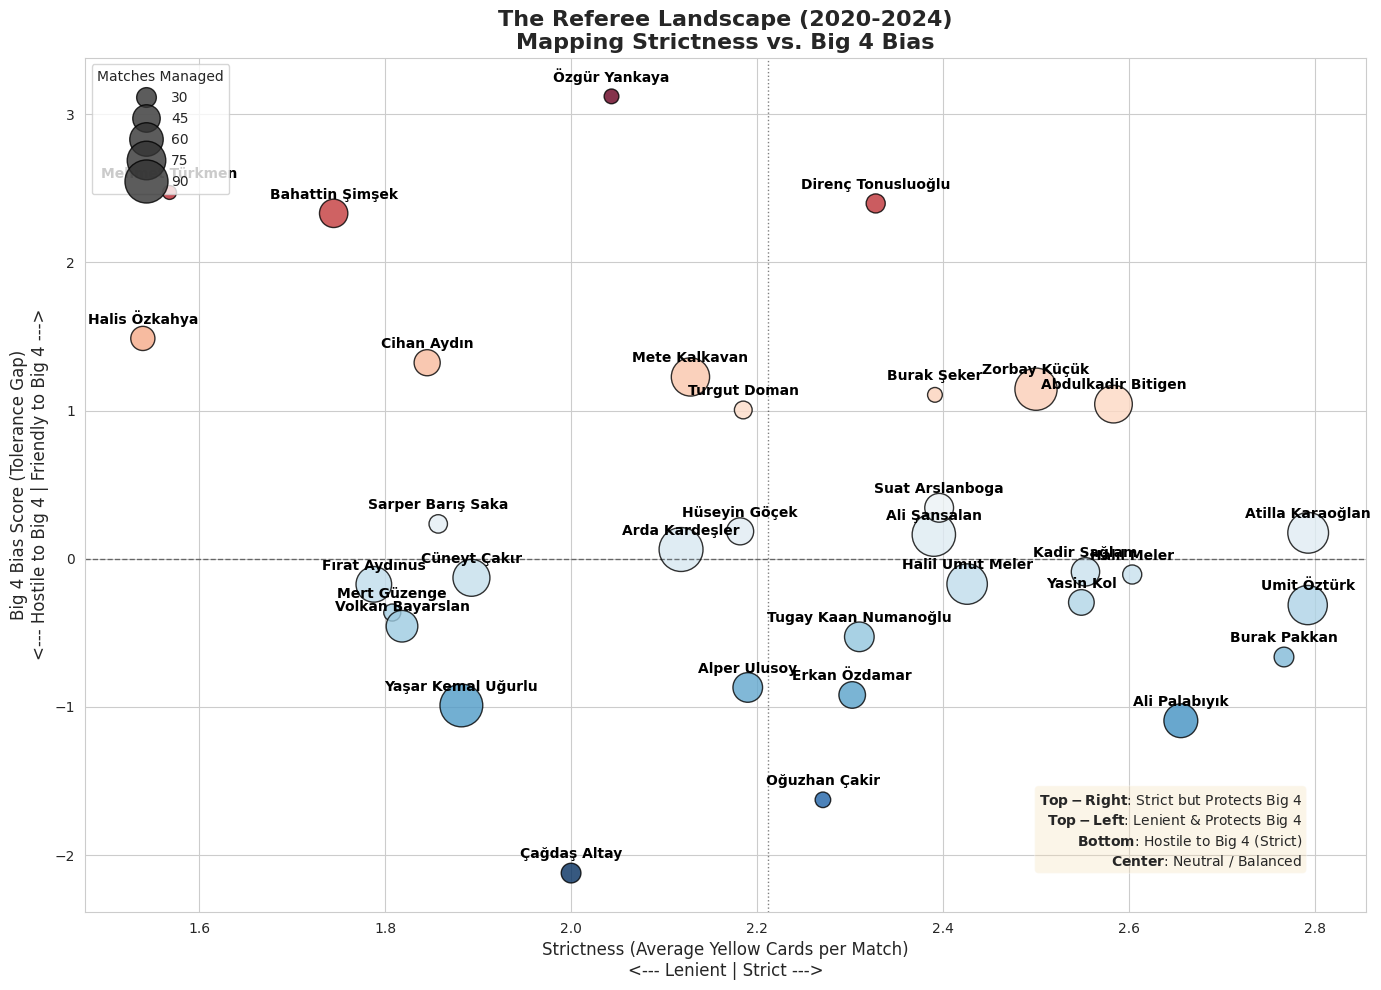

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv')

# Filter for the last few seasons to capture the "Current Landscape"
# Using last 7 seasons to ensure robust sample sizes
seasons = [1819,1920,2021, 2122, 2223, 2324,2425]
df_recent = df[df['Season'].isin(seasons)].copy()

# Prepare Long Format Data (Team-Match level)
home_df = df_recent[['Date', 'HomeTeam', 'HF', 'HY', 'Referee', 'Home_is_Big4']].rename(
    columns={'HomeTeam': 'Team', 'HF': 'Fouls', 'HY': 'YellowCards', 'Home_is_Big4': 'Is_Big4'}
)
away_df = df_recent[['Date', 'AwayTeam', 'AF', 'AY', 'Referee', 'Away_is_Big4']].rename(
    columns={'AwayTeam': 'Team', 'AF': 'Fouls', 'AY': 'YellowCards', 'Away_is_Big4': 'Is_Big4'}
)
full_stats = pd.concat([home_df, away_df], ignore_index=True)

# Calculate Tolerance for each record (handling division by zero)
full_stats['Tolerance'] = full_stats['Fouls'] / full_stats['YellowCards'].replace(0, 1)

# Group by Referee
ref_stats = []
for ref, group in full_stats.groupby('Referee'):
    matches = group['Date'].nunique() # Unique dates usually mean unique matches

    # Needs a minimum number of matches to be statistically relevant
    if matches < 20:
        continue

    # Split into Big 4 and Others
    big4_games = group[group['Is_Big4'] == 1]
    other_games = group[group['Is_Big4'] == 0]

    # Calculate metrics
    avg_cards = group['YellowCards'].mean() # General Strictness

    # Tolerance calculations (Total Fouls / Total Cards is more stable than Mean of Ratios)
    if len(big4_games) > 0:
        tol_big4 = big4_games['Fouls'].sum() / big4_games['YellowCards'].replace(0, 1).sum()
    else:
        tol_big4 = np.nan

    if len(other_games) > 0:
        tol_other = other_games['Fouls'].sum() / other_games['YellowCards'].replace(0, 1).sum()
    else:
        tol_other = np.nan

    if pd.notna(tol_big4) and pd.notna(tol_other):
        bias = tol_big4 - tol_other
        ref_stats.append({
            'Referee': ref,
            'Matches': matches,
            'Avg_Cards': avg_cards, # X-Axis: Strictness
            'Bias_Score': bias,     # Y-Axis: Bias
            'Tol_Big4': tol_big4,
            'Tol_Other': tol_other
        })

ref_df = pd.DataFrame(ref_stats)

# --- Visualization: The Referee Landscape ---
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create Scatter Plot
# X: Strictness (Avg Cards), Y: Bias (Diff in Tolerance)
# Size: Experience (Matches)
# Color: Bias Direction
scatter = sns.scatterplot(
    data=ref_df,
    x='Avg_Cards',
    y='Bias_Score',
    size='Matches',
    sizes=(100, 1000),
    hue='Bias_Score',
    palette='RdBu_r', # Red (Positive Bias) to Blue (Negative Bias)
    alpha=0.8,
    edgecolor='black',
    linewidth=1
)

# Reference Lines
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5) # Neutral Bias Line
plt.axvline(ref_df['Avg_Cards'].mean(), color='black', linestyle=':', linewidth=1, alpha=0.5) # Avg Strictness

# Annotations (Gestalt: Proximity)
# Annotate referees with high bias or high match count (Key figures)
for i in range(ref_df.shape[0]):
    row = ref_df.iloc[i]
    # Label if Bias is significant (> 1.0 or < -0.5) OR if they are very strict/lenient OR frequent refs
    if abs(row['Bias_Score']) > 0.8 or row['Matches'] > 60 or row['Avg_Cards'] > 5.0 or row['Avg_Cards'] < 3.5:
        plt.text(
            row['Avg_Cards'],
            row['Bias_Score'] + 0.1, # Shift text slightly up
            row['Referee'],
            horizontalalignment='center',
            size=10,
            weight='bold',
            color='black'
        )

# Titles and Labels
plt.title('The Referee Landscape (2020-2024)\nMapping Strictness vs. Big 4 Bias', fontsize=16, weight='bold')
plt.xlabel('Strictness (Average Yellow Cards per Match)\n<--- Lenient | Strict --->', fontsize=12)
plt.ylabel('Big 4 Bias Score (Tolerance Gap)\n<--- Hostile to Big 4 | Friendly to Big 4 --->', fontsize=12)

# Custom Legend
# Handle the legend manually to make it cleaner
h, l = scatter.get_legend_handles_labels()
# We generally only want the size legend, the colorbar explains the hue better but seaborn scatter combines them
plt.legend(h[-5:], l[-5:], title="Matches Managed", loc='upper left', frameon=True)

# Add text box for interpretation
textstr = '\n'.join((
    r'$\bf{Top-Right}$: Strict but Protects Big 4',
    r'$\bf{Top-Left}$: Lenient & Protects Big 4',
    r'$\bf{Bottom}$: Hostile to Big 4 (Strict)',
    r'$\bf{Center}$: Neutral / Balanced'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig('referee_landscape_final.png')
plt.show()

# After Adding the Rank Factor into the Equation/ Title Contender


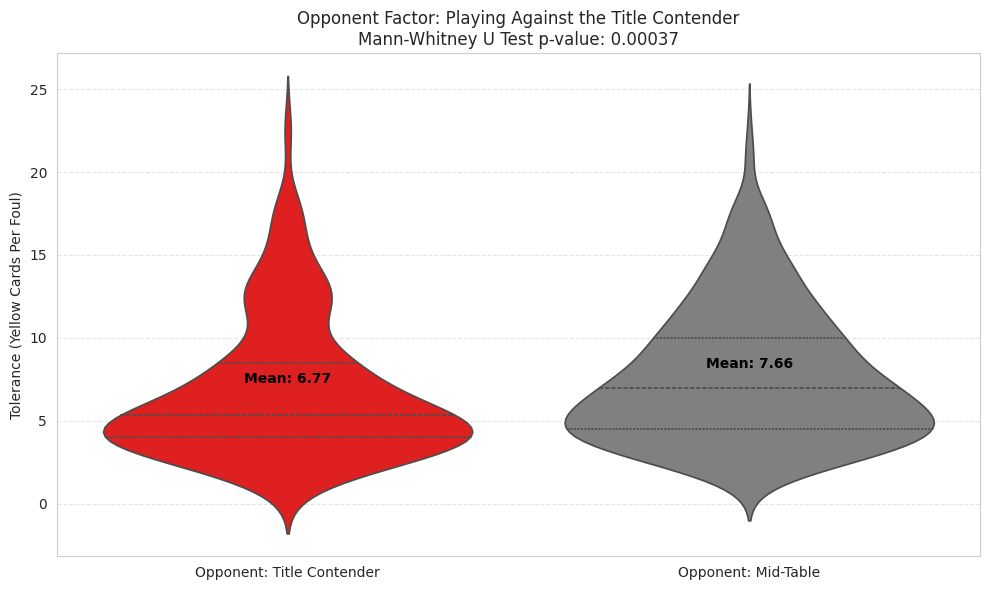


--- ANALİZ SONUÇLARI ---
Şampiyon Adayına Karşı Oynayanların Toleransı: 6.77
Sıradan Maça Çıkanların Toleransı: 7.66
Fark: 0.88 faul (Şampiyon adayına karşı oynarken kartlar daha hızlı çıkıyor)
P-Değeri: 0.000372


In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hazır Dosyayı Yükle
# (Bu dosyanın içinde 'Home_Rank', 'Away_Rank' sütunları olduğunu varsayıyoruz)
df = pd.read_csv('TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv')

# 2. Veri Temizliği (Sadece Sıralama Verisi Olan Maçları Al)
# İlk yarı maçları NaN olduğu için otomatik olarak elenir.
df_critical = df.dropna(subset=['Home_Rank', 'Away_Rank']).copy()

# 3. Rakip Perspektifi (Opponent Analysis)
# Amacımız: Rakibim kim ve ben ona karşı oynarken ne kadar tolerans görüyorum?

# Ev Sahibi Takımların Perspektifi
home_stats = df_critical[['HomeTeam', 'HF', 'HY', 'AwayTeam', 'Away_Rank', 'Away_is_Big4']].rename(
    columns={'HomeTeam': 'Team', 'HF': 'Fouls', 'HY': 'YellowCards',
             'AwayTeam': 'Opponent', 'Away_Rank': 'Opponent_Rank', 'Away_is_Big4': 'Opponent_Is_Big4'}
)

# Deplasman Takımların Perspektifi
away_stats = df_critical[['AwayTeam', 'AF', 'AY', 'HomeTeam', 'Home_Rank', 'Home_is_Big4']].rename(
    columns={'AwayTeam': 'Team', 'AF': 'Fouls', 'AY': 'YellowCards',
             'HomeTeam': 'Opponent', 'Home_Rank': 'Opponent_Rank', 'Home_is_Big4': 'Opponent_Is_Big4'}
)

# Veriyi Birleştir
opponent_analysis_df = pd.concat([home_stats, away_stats], ignore_index=True)

# Tolerans Hesabı (Sıfıra bölünmeyi önleyerek)
opponent_analysis_df['Tolerance'] = opponent_analysis_df['Fouls'] / opponent_analysis_df['YellowCards'].replace(0, 1)

# 4. Grupları Oluştur
# GRUP A: Rakibi "Şampiyonluğa Oynayan Big 4" Olanlar (Sıralaması ilk 3'te olan Big 4)
group_victim = opponent_analysis_df[
    (opponent_analysis_df['Opponent_Is_Big4'] == 1) &
    (opponent_analysis_df['Opponent_Rank'] <= 3)
]

# GRUP B (Kontrol Grubu): Rakibi "Orta Sıra Anadolu Takımı" Olanlar (Sıralaması 8-12 arası)
group_control = opponent_analysis_df[
    (opponent_analysis_df['Opponent_Is_Big4'] == 0) &
    (opponent_analysis_df['Opponent_Rank'].between(8, 12))
]

# 5. İstatistiksel Test (Mann-Whitney U)
# Veriler normal dağılmadığı için T-Test yerine bunu kullanıyoruz.
u_stat, p_val = stats.mannwhitneyu(group_victim['Tolerance'], group_control['Tolerance'], alternative='two-sided')

# 6. Görselleştirme (Keman Grafiği)
plt.figure(figsize=(10, 6))
plot_data = pd.concat([
    group_victim.assign(Condition='Opponent: Title Contender'),
    group_control.assign(Condition='Opponent: Mid-Table')
])

sns.violinplot(data=plot_data, x='Condition', y='Tolerance', palette=['red', 'gray'], inner='quartile')
plt.title(f'Opponent Factor: Playing Against the Title Contender\nMann-Whitney U Test p-value: {p_val:.5f}')
plt.ylabel('Tolerance (Yellow Cards Per Foul)')
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Ortalamaları Yazdır
mean_victim = group_victim['Tolerance'].mean()
mean_control = group_control['Tolerance'].mean()
plt.text(0, mean_victim + 0.5, f"Mean: {mean_victim:.2f}", ha='center', color='black', weight='bold')
plt.text(1, mean_control + 0.5, f"Mean: {mean_control:.2f}", ha='center', color='black', weight='bold')

plt.tight_layout()
plt.savefig('opponent_tolerance_effect.png') # Grafiği kaydeder
plt.show()

# 7. Sonuç Çıktısı
print("\n--- ANALİZ SONUÇLARI ---")
print(f"Şampiyon Adayına Karşı Oynayanların Toleransı: {mean_victim:.2f}")
print(f"Sıradan Maça Çıkanların Toleransı: {mean_control:.2f}")
print(f"Fark: {mean_control - mean_victim:.2f} faul (Şampiyon adayına karşı oynarken kartlar daha hızlı çıkıyor)")
print(f"P-Değeri: {p_val:.6f}")

#Relegation Zone Analysis

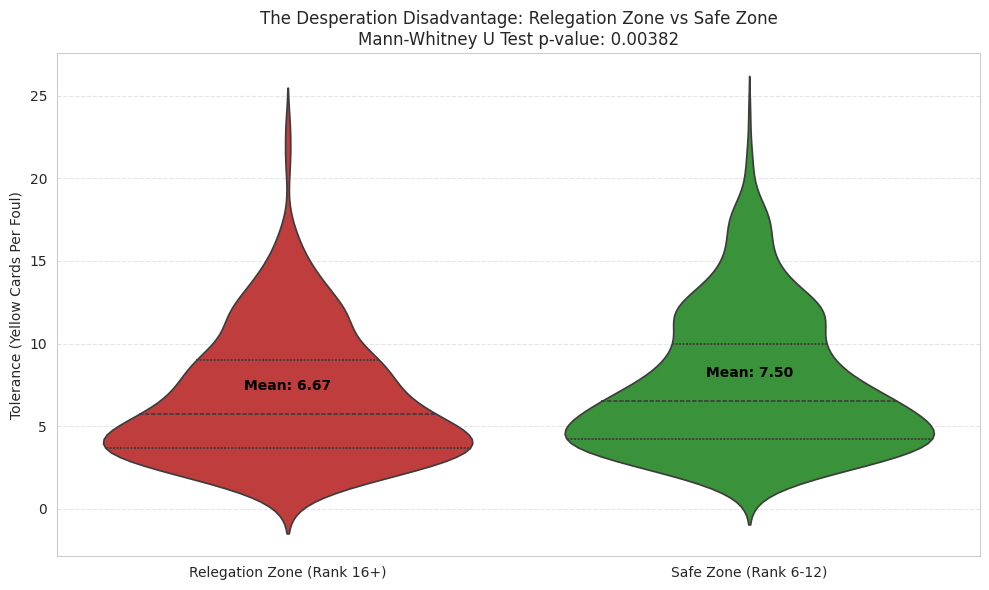


--- RELEGATION ZONE ANALİZ SONUÇLARI ---
Düşme Hattındaki Takımların Toleransı: 6.67
Güvenli Bölgedeki Takımların Toleransı: 7.50
Fark: 0.83 faul (Düşme hattındakiler daha kolay kart görüyor)
P-Değeri: 0.003817
Veri Seti Boyutları:
Relegation Sample Size: 267
Safe Zone Sample Size: 778


In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hazır Dosyayı Yükle
df = pd.read_csv('TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv')

# 2. Veri Temizliği (Sıralama Verisi Olan Maçları Al)
df_critical = df.dropna(subset=['Home_Rank', 'Away_Rank']).copy()

# 3. Takım Perspektifi (Team Analysis)
# Amacımız: Küme düşme hattındaki takımların kendisi ne kadar tolerans görüyor?

# Ev Sahibi Takımların Perspektifi (Kendi Sıralamasıyla)
home_stats = df_critical[['HomeTeam', 'HF', 'HY', 'Home_Rank']].rename(
    columns={'HomeTeam': 'Team', 'HF': 'Fouls', 'HY': 'YellowCards', 'Home_Rank': 'Rank'}
)

# Deplasman Takımların Perspektifi (Kendi Sıralamasıyla)
away_stats = df_critical[['AwayTeam', 'AF', 'AY', 'Away_Rank']].rename(
    columns={'AwayTeam': 'Team', 'AF': 'Fouls', 'AY': 'YellowCards', 'Away_Rank': 'Rank'}
)

# Veriyi Birleştir
team_analysis_df = pd.concat([home_stats, away_stats], ignore_index=True)

# Tolerans Hesabı (Sıfıra bölünmeyi önleyerek)
team_analysis_df['Tolerance'] = team_analysis_df['Fouls'] / team_analysis_df['YellowCards'].replace(0, 1)

# 4. Grupları Oluştur
# GRUP A (Relegation Zone): Küme Düşme Hattındaki Takımlar (Sıralaması 16 ve üzeri)
group_relegation = team_analysis_df[team_analysis_df['Rank'] >= 16]

# GRUP B (Safe Zone): Orta Sıra Takımları (Sıralaması 6-12 arası) - Kontrol Grubu
group_safe = team_analysis_df[team_analysis_df['Rank'].between(6, 12)]

# 5. İstatistiksel Test (Mann-Whitney U)
u_stat, p_val = stats.mannwhitneyu(group_relegation['Tolerance'], group_safe['Tolerance'], alternative='two-sided')

# 6. Görselleştirme (Keman Grafiği)
plt.figure(figsize=(10, 6))
plot_data = pd.concat([
    group_relegation.assign(Condition='Relegation Zone (Rank 16+)'),
    group_safe.assign(Condition='Safe Zone (Rank 6-12)')
])

sns.violinplot(data=plot_data, x='Condition', y='Tolerance', palette=['#d62728', '#2ca02c'], inner='quartile')
plt.title(f'The Desperation Disadvantage: Relegation Zone vs Safe Zone\nMann-Whitney U Test p-value: {p_val:.5f}')
plt.ylabel('Tolerance (Yellow Cards Per Foul)')
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Ortalamaları Yazdır
mean_relegation = group_relegation['Tolerance'].mean()
mean_safe = group_safe['Tolerance'].mean()
plt.text(0, mean_relegation + 0.5, f"Mean: {mean_relegation:.2f}", ha='center', color='black', weight='bold')
plt.text(1, mean_safe + 0.5, f"Mean: {mean_safe:.2f}", ha='center', color='black', weight='bold')

plt.tight_layout()
plt.savefig('relegation_tolerance_violin.png')
plt.show()

# 7. Sonuç Çıktısı
print("\n--- RELEGATION ZONE ANALİZ SONUÇLARI ---")
print(f"Düşme Hattındaki Takımların Toleransı: {mean_relegation:.2f}")
print(f"Güvenli Bölgedeki Takımların Toleransı: {mean_safe:.2f}")
print(f"Fark: {mean_safe - mean_relegation:.2f} faul (Düşme hattındakiler daha kolay kart görüyor)")
print(f"P-Değeri: {p_val:.6f}")
print("Veri Seti Boyutları:")
print(f"Relegation Sample Size: {len(group_relegation)}")
print(f"Safe Zone Sample Size: {len(group_safe)}")

# Time Series Analysis

--- VAR Analizi Başlatılıyor ---
Grafik Kaydedildi: var_effect_analysis.png


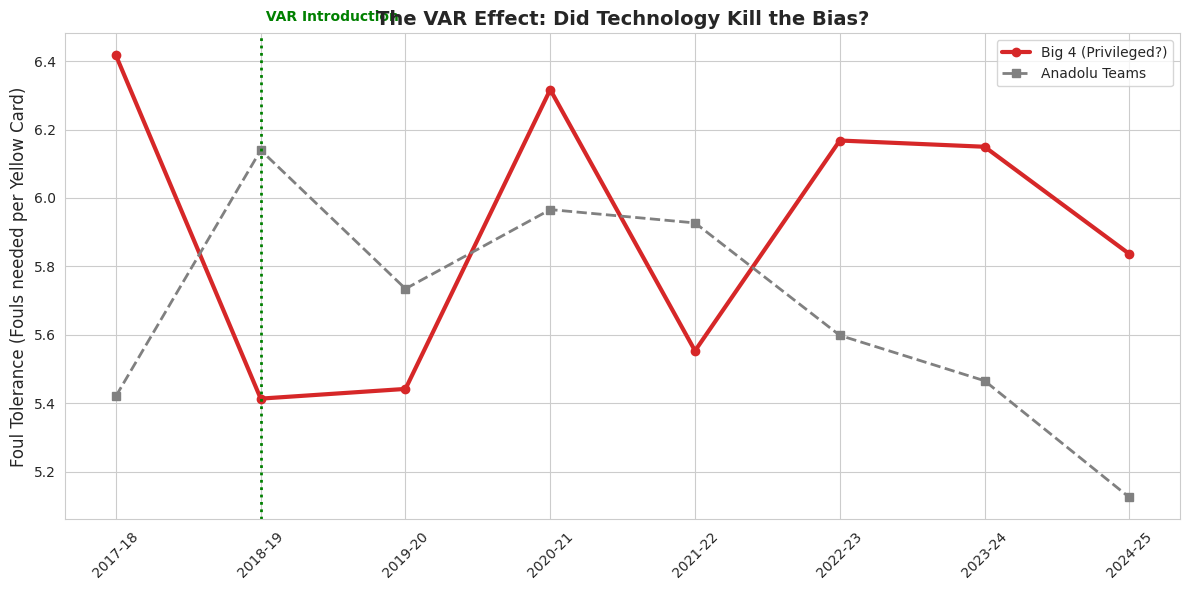

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# ==========================================
# 1. VAR ETKİSİ VE ZAMAN SERİSİ ANALİZİ
# ==========================================
print("--- VAR Analizi Başlatılıyor ---")

# Dosyayı Yükle
df = pd.read_csv('TURKISH_SUPER_LIG_FULL_DATASET_WITH_RANKS.csv')
df['Season'] = df['Season'].astype(str) # Sezonu string yapalım (1718, 1819 vs.)

# Sezonluk İstatistikleri Hesapla
trend_data = []
for season in sorted(df['Season'].unique()):
    season_df = df[df['Season'] == season]

    # Big 4 İstatistikleri
    b4_mask = (season_df['Home_is_Big4'] == 1) | (season_df['Away_is_Big4'] == 1)
    # Ev veya Dep sahibi Big 4 ise o takımın faul/kartlarını topla (Basitleştirilmiş)
    # Daha hassas hesap:
    home_b4 = season_df[season_df['Home_is_Big4'] == 1]
    away_b4 = season_df[season_df['Away_is_Big4'] == 1]

    tol_b4 = (home_b4['HF'].sum() + away_b4['AF'].sum()) / \
             max(1, (home_b4['HY'].sum() + away_b4['AY'].sum()))

    # Anadolu İstatistikleri
    home_oth = season_df[season_df['Home_is_Big4'] == 0]
    away_oth = season_df[season_df['Away_is_Big4'] == 0]

    tol_oth = (home_oth['HF'].sum() + away_oth['AF'].sum()) / \
              max(1, (home_oth['HY'].sum() + away_oth['AY'].sum()))

    trend_data.append({
        'Season': season,
        'Big4_Tolerance': tol_b4,
        'Others_Tolerance': tol_oth,
        'Bias_Gap': tol_b4 - tol_oth
    })

trend_df = pd.DataFrame(trend_data)

# Sezon İsimlerini Güzelleştir (1718 -> 2017-18)
trend_df['Season_Label'] = trend_df['Season'].apply(lambda x: f"20{x[:2]}-{x[2:]}" if len(x)==4 else x)

# Grafiği Çiz
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(trend_df['Season_Label'], trend_df['Big4_Tolerance'], marker='o', color='#d62728', linewidth=3, label='Big 4 (Privileged?)')
plt.plot(trend_df['Season_Label'], trend_df['Others_Tolerance'], marker='s', color='gray', linewidth=2, linestyle='--', label='Anadolu Teams')

# VAR Çizgisi (2018-19 Başlangıç)
var_season = '2018-19'
if var_season in trend_df['Season_Label'].values:
    plt.axvline(x=var_season, color='green', linestyle=':', linewidth=2)
    plt.text(var_season, trend_df['Big4_Tolerance'].max() + 0.1, ' VAR Introduction', color='green', fontweight='bold')

plt.title('The VAR Effect: Did Technology Kill the Bias?', fontsize=14, fontweight='bold')
plt.ylabel('Foul Tolerance (Fouls needed per Yellow Card)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('var_effect_analysis.png')
print("Grafik Kaydedildi: var_effect_analysis.png")

# Card Distribution

Kart İstatistikleri:
count    2162.000000
mean        4.572155
std         2.356010
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        15.000000
Name: Total_Yellow_Cards, dtype: float64


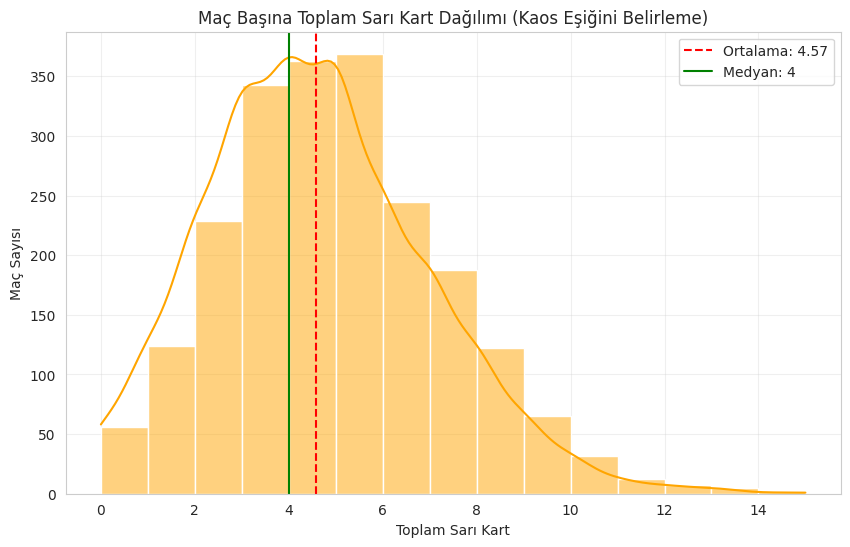

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veriyi Yükle
df = pd.read_csv('TURKISH_SUPER_LIG_FINAL_CLUSTERED.csv')

# 2. Toplam Kart Sayısını Hesapla
# Eğer HY/AY yoksa (bazen veri setinde isimler farklı olabilir), kontrol edelim.
# Previous snippets showed HY, AY are present.
df['Total_Yellow_Cards'] = df['HY'] + df['AY']

# 3. İstatistiklere Bakalım
stats = df['Total_Yellow_Cards'].describe()
print("Kart İstatistikleri:")
print(stats)

# 4. Dağılımı Görselleştir
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Yellow_Cards'], bins=15, kde=True, color='orange')
plt.axvline(stats['mean'], color='red', linestyle='--', label=f"Ortalama: {stats['mean']:.2f}")
plt.axvline(stats['50%'], color='green', linestyle='-', label=f"Medyan: {stats['50%']:.0f}")
plt.title('Maç Başına Toplam Sarı Kart Dağılımı (Kaos Eşiğini Belirleme)')
plt.xlabel('Toplam Sarı Kart')
plt.ylabel('Maç Sayısı')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('card_distribution_chaos.png')
plt.show()